# Simple Linear Regression
# Multiple Linear Regression
# Polynomial Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data=pd.DataFrame({'diameter':[6,8,10,14,18],'price':[7,9,13,17.5,18]})
data

,diameter,price
0,6,7.0
1,8,9.0
2,10,13.0
3,14,17.5
4,18,18.0


In [30]:
X=data.diameter.values.reshape(5,1)
X

array([[ 6],
       [ 8],
       [10],
       [14],
       [18]], dtype=int64)

In [8]:
y=data.price.values.reshape(5,1)
y

array([[ 7. ],
       [ 9. ],
       [13. ],
       [17.5],
       [18. ]])

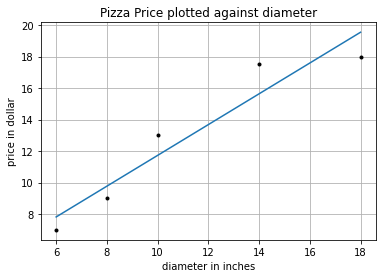

In [32]:
plt.figure()
plt.title("Pizza Price plotted against diameter")
plt.xlabel('diameter in inches')
plt.ylabel('price in dollar')
plt.plot(X,y,'k.')
plt.plot(X,predicted_price)
plt.grid(True)
plt.show()

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
simple_linear_regressor=LinearRegression()

In [18]:
simple_linear_regressor.fit(X,y)

LinearRegression()

In [21]:
predicted_price=simple_linear_regressor.predict(X)

In [22]:
predicted_price

array([[ 7.82327586],
       [ 9.77586207],
       [11.72844828],
       [15.63362069],
       [19.5387931 ]])

In [23]:
data["predicted price"]=predicted_price

In [24]:
data


,diameter,price,predicted price
0,6,7.0,7.823276
1,8,9.0,9.775862
2,10,13.0,11.728448
3,14,17.5,15.633621
4,18,18.0,19.538793


In [26]:
print(f"Residual sum of squares: {np.mean((simple_linear_regressor.predict(X)-y)**2)}")

Residual sum of squares: 1.7495689655172406


In [27]:
print(f"A 12 inches pizza will cost: {simple_linear_regressor.predict([[12]])}")

A 12 inches pizza will cost: [[13.68103448]]


In [28]:
print(f"A 500 inches pizza will cost: {simple_linear_regressor.predict([[500]])}")

A 500 inches pizza will cost: [[490.11206897]]


In [33]:
test_data =pd.DataFrame({'diameter':[8,9,11,16,12],'price':[11,8.5,15,18,11]})
test_data

,diameter,price
0,8,11.0
1,9,8.5
2,11,15.0
3,16,18.0
4,12,11.0


In [34]:
X_test=test_data.diameter.values.reshape(5,1)
X_test

array([[ 8],
       [ 9],
       [11],
       [16],
       [12]], dtype=int64)

In [35]:
y_test=test_data.price.values.reshape(5,1)
y_test

array([[11. ],
       [ 8.5],
       [15. ],
       [18. ],
       [11. ]])

In [36]:
predicted_price1=simple_linear_regressor.predict(X_test)-y_test

In [37]:
predicted_price1

array([[-1.22413793],
       [ 2.25215517],
       [-2.29525862],
       [-0.4137931 ],
       [ 2.68103448]])

In [39]:
r2_score=simple_linear_regressor.score(X_test,y_test)
r2_score

0.6620052929422553

# Multiple Linear Regression

In [41]:
data_train=pd.DataFrame({'diameter':[6,8,10,14,18],'toppings':[2,1,0,2,0],'price':[7,9,13,17.5,18]})
data_train

,diameter,toppings,price
0,6,2,7.0
1,8,1,9.0
2,10,0,13.0
3,14,2,17.5
4,18,0,18.0


In [42]:
#X_train=data_train.drop('price')
X_train=data_train[['diameter','toppings']].values
X_train

array([[ 6,  2],
       [ 8,  1],
       [10,  0],
       [14,  2],
       [18,  0]], dtype=int64)

In [43]:
y_train=data_train.price.values.reshape(5,1)
y_train

array([[ 7. ],
       [ 9. ],
       [13. ],
       [17.5],
       [18. ]])

In [44]:
multiple_linear_regressor=LinearRegression()

In [45]:
multiple_linear_regressor.fit(X_train,y_train)

LinearRegression()

In [46]:
data_test=pd.DataFrame({'diameter':[8,9,11,16,12],'toppings':[2,0,2,2,0],'price':[11,8.5,15,18,11]})
data_test

,diameter,toppings,price
0,8,2,11.0
1,9,0,8.5
2,11,2,15.0
3,16,2,18.0
4,12,0,11.0


In [47]:
X_test = data_test[['diameter','toppings']]
y_test=data_test.price.values.reshape(5,1)

In [48]:
predictions=multiple_linear_regressor.predict(X_test)

In [49]:
for i ,prediction in enumerate(predictions):
    print(f"predicted: {prediction} >>>> Actual: {y_test[i]}")

predicted: [10.0625] >>>> Actual: [11.]
predicted: [10.28125] >>>> Actual: [8.5]
predicted: [13.09375] >>>> Actual: [15.]
predicted: [18.14583333] >>>> Actual: [18.]
predicted: [13.3125] >>>> Actual: [11.]


In [50]:
multiple_linear_regressor.score(X_test,y_test)

0.7701677731318468